In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("application_data.csv")

In [3]:
print(df1.shape , "\n")           
print(df1.info())     

(307511, 122) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(df1.head(5))

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
print(df1.describe(include="all"))

           SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
uni

# missing values

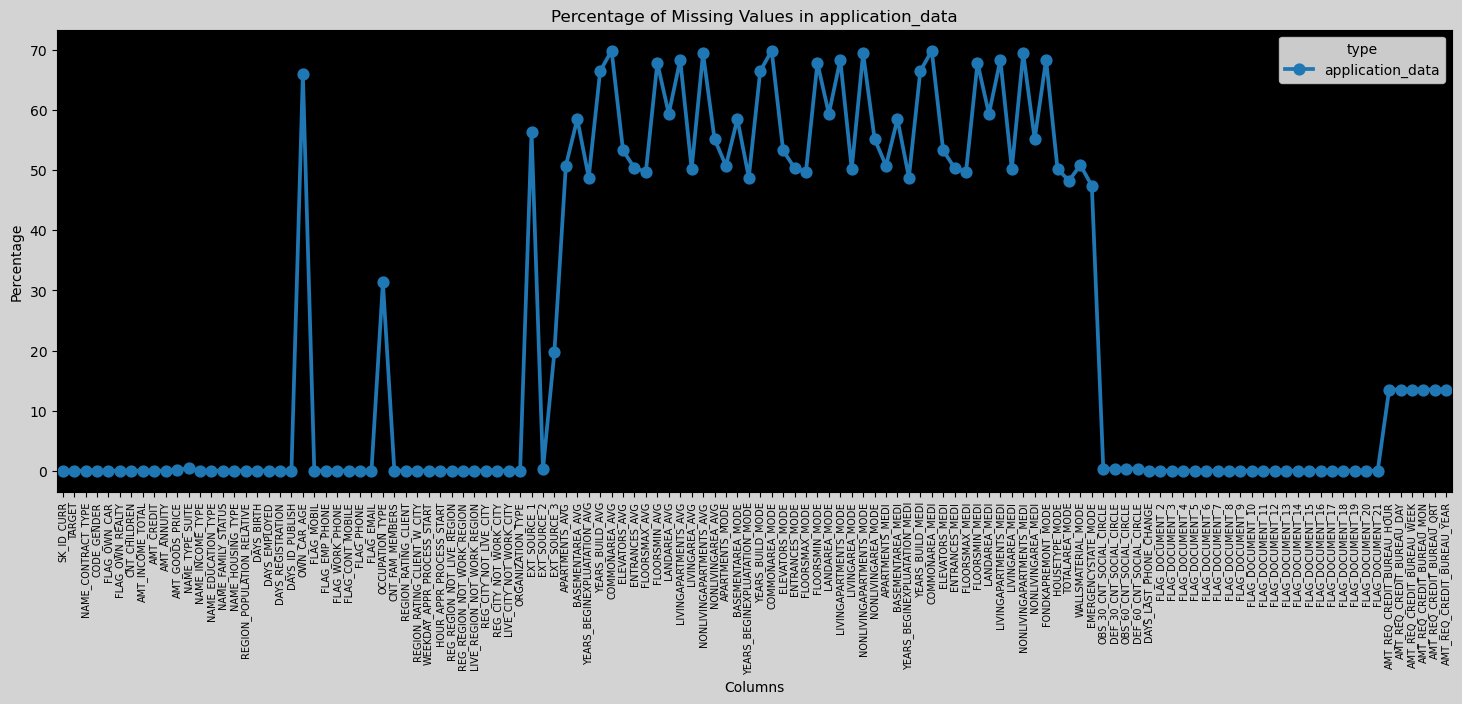

In [10]:
miss_application_data = (
    df1.isnull().sum() * 100 / df1.shape[0]
).reset_index()

miss_application_data.columns = ['column', 'missing_percent']
miss_application_data['type'] = 'application_data'

fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(
    x='column',
    y='missing_percent',
    data=miss_application_data,
    hue='type'
)

plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values in application_data")
plt.ylabel("Percentage")
plt.xlabel("Columns")

ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

plt.show()


# TARGET VARIABLE

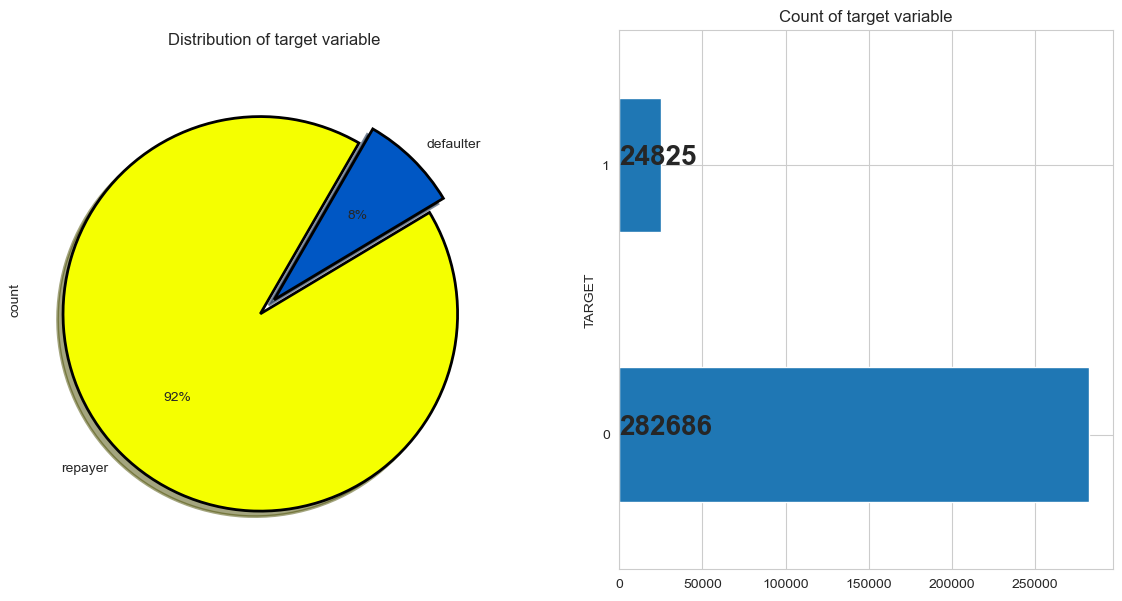

In [18]:
plt.figure(figsize=(14,7))
plt.subplot(121)
df1["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["repayer","defaulter"],
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = df1["TARGET"].value_counts().plot(kind="barh")

for i,j in enumerate(df1["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
plt.show()


# AGE

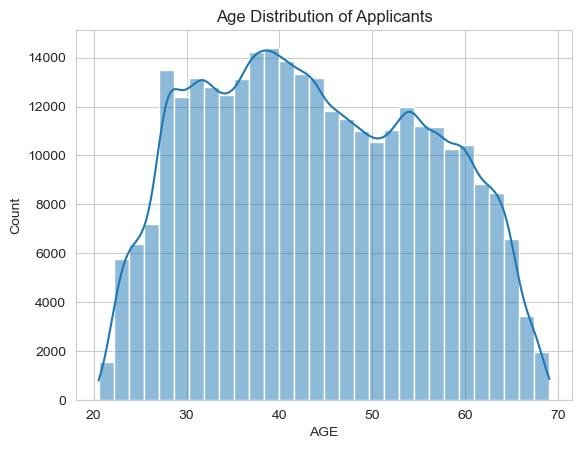

In [32]:
df1['AGE'] = -df1['DAYS_BIRTH'] / 365
sns.histplot(df1['AGE'], bins=30, kde=True)
plt.title("Age Distribution of Applicants")
plt.show()


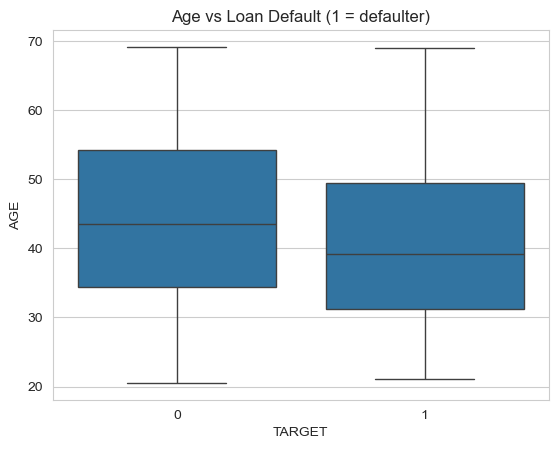

In [34]:
sns.boxplot(x='TARGET', y='AGE', data=df1)
plt.title("Age vs Loan Default (1 = defaulter)")
plt.show()


# FAMILY

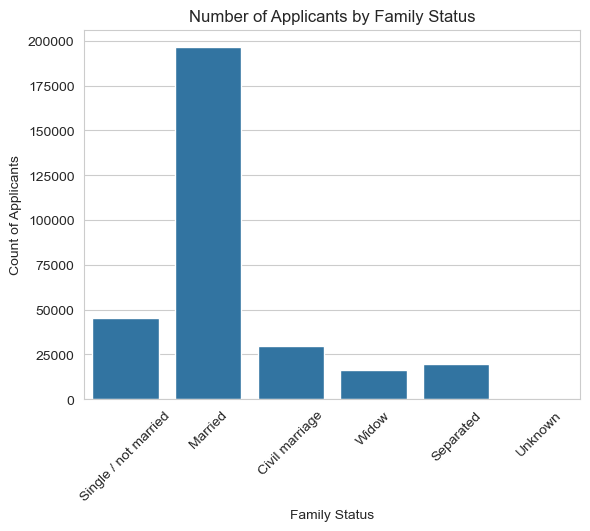

In [88]:
sns.countplot(x='NAME_FAMILY_STATUS', data=df1)
plt.title("Number of Applicants by Family Status")
plt.xticks(rotation=45)
plt.ylabel("Count of Applicants")
plt.xlabel("Family Status")
plt.show()




C:\Users\foxhu\AppData\Local\Temp\ipykernel_3108\1654262419.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='NAME_FAMILY_STATUS', y='Default_Rate', data=family_default, ci=None)


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Civil marriage'),
  Text(1, 0, 'Married'),
  Text(2, 0, 'Separated'),
  Text(3, 0, 'Single / not married'),
  Text(4, 0, 'Unknown'),
  Text(5, 0, 'Widow')])

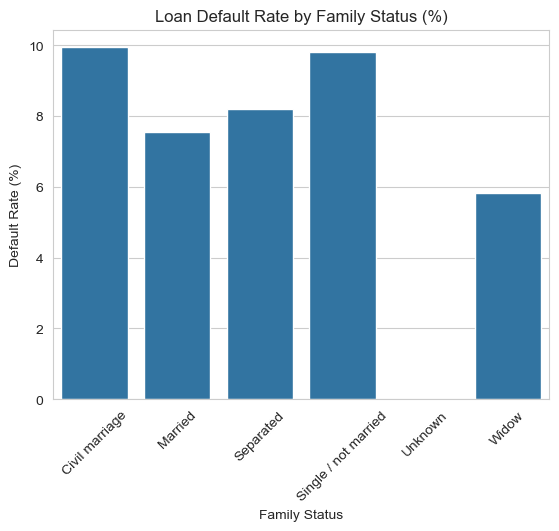

In [93]:
family_default = (
    df1.groupby('NAME_FAMILY_STATUS')['TARGET']
       .mean()
       .reset_index()
       .rename(columns={'TARGET': 'Default_Rate'})
)

family_default['Default_Rate'] = family_default['Default_Rate'] * 100

ax = sns.barplot(x='NAME_FAMILY_STATUS', y='Default_Rate', data=family_default, ci=None)
plt.title("Loan Default Rate by Family Status (%)")
plt.ylabel("Default Rate (%)")
plt.xlabel("Family Status")
plt.xticks(rotation=45)



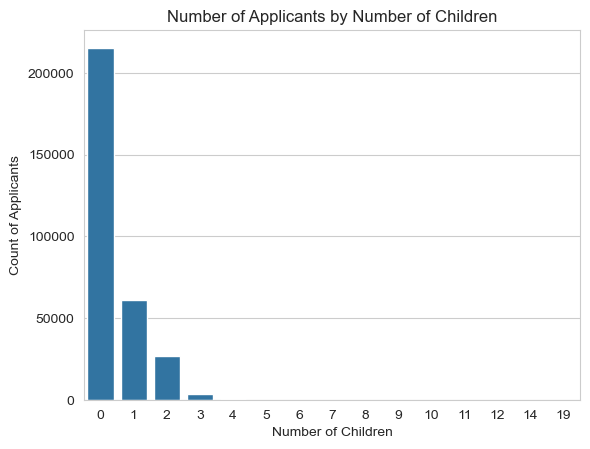

In [102]:
sns.countplot(x='CNT_CHILDREN', data=df1)
plt.title("Number of Applicants by Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Count of Applicants")
plt.show()


C:\Users\foxhu\AppData\Local\Temp\ipykernel_3108\1670415442.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='CNT_CHILDREN', y='Default_Rate', data=children_default, ci=None)


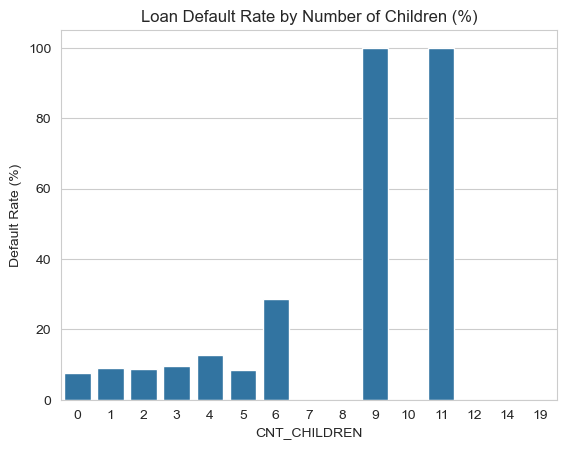

In [61]:
children_default = (
    df1.groupby('CNT_CHILDREN')['TARGET']
       .mean()
       .reset_index()
       .rename(columns={'TARGET': 'Default_Rate'})
)
children_default['Default_Rate'] *= 100

sns.barplot(x='CNT_CHILDREN', y='Default_Rate', data=children_default, ci=None)
plt.title("Loan Default Rate by Number of Children (%)")
plt.ylabel("Default Rate (%)")
plt.show()


# EDUCATION

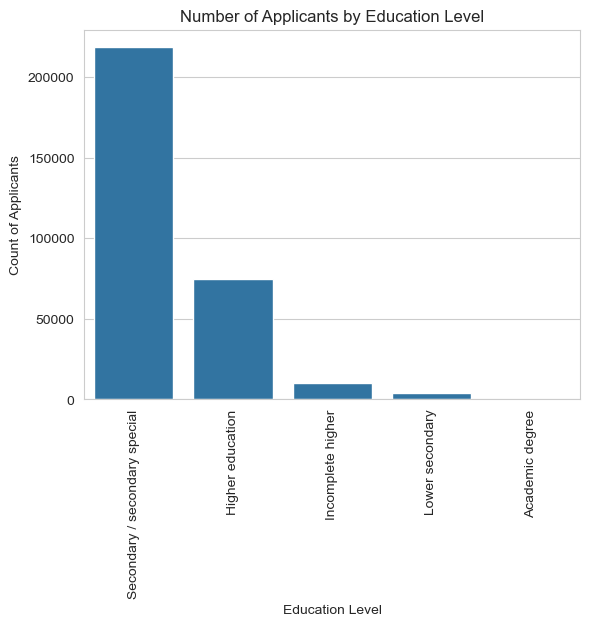

In [104]:
sns.countplot(x='NAME_EDUCATION_TYPE', data=df1)
plt.title("Number of Applicants by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count of Applicants")
plt.xticks(rotation=90)
plt.show()


C:\Users\foxhu\AppData\Local\Temp\ipykernel_3108\2902539300.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='NAME_EDUCATION_TYPE', y='Default_Rate', data=education_default, ci=None)


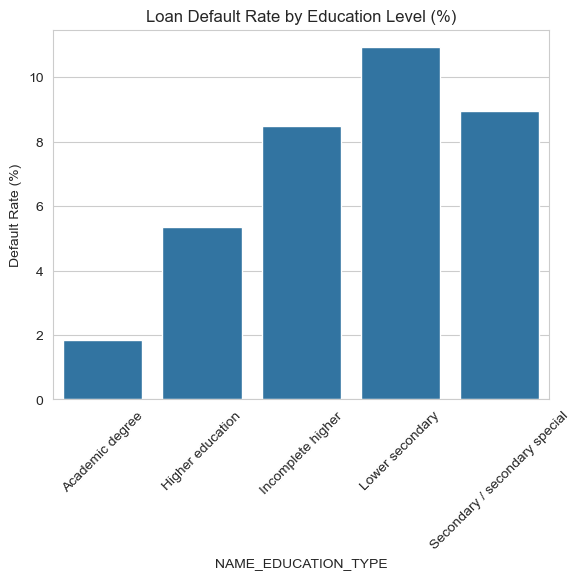

In [62]:
education_default = (
    df1.groupby('NAME_EDUCATION_TYPE')['TARGET']
       .mean()
       .reset_index()
       .rename(columns={'TARGET': 'Default_Rate'})
)
education_default['Default_Rate'] *= 100

sns.barplot(x='NAME_EDUCATION_TYPE', y='Default_Rate', data=education_default, ci=None)
plt.xticks(rotation=45)
plt.title("Loan Default Rate by Education Level (%)")
plt.ylabel("Default Rate (%)")
plt.show()


# TYPE_SUITE

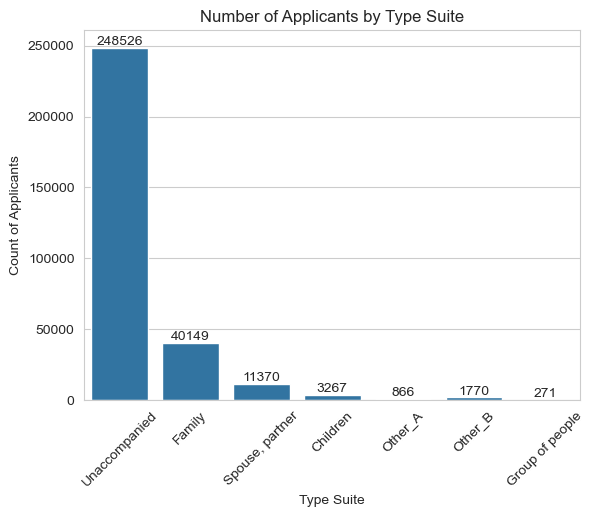

In [85]:
ax = sns.countplot(x='NAME_TYPE_SUITE', data=df1)
plt.title("Number of Applicants by Type Suite")
plt.xticks(rotation=45)
plt.ylabel("Count of Applicants")
plt.xlabel("Type Suite")

for container in ax.containers:
    ax.bar_label(container)

plt.show()


C:\Users\foxhu\AppData\Local\Temp\ipykernel_3108\1551268385.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='NAME_TYPE_SUITE', y='Default_Rate', data=suite_default, ci=None)


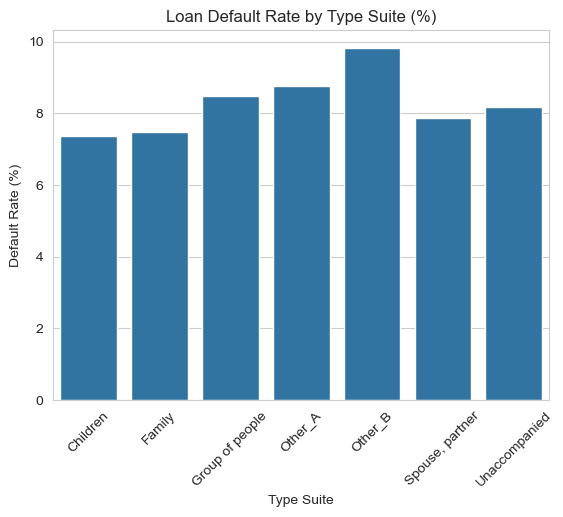

In [79]:
suite_default = (
    df1.groupby('NAME_TYPE_SUITE')['TARGET']
       .mean()
       .reset_index()
       .rename(columns={'TARGET': 'Default_Rate'})
)

suite_default['Default_Rate'] = suite_default['Default_Rate'] * 100

ax = sns.barplot(x='NAME_TYPE_SUITE', y='Default_Rate', data=suite_default, ci=None)
plt.title("Loan Default Rate by Type Suite (%)")
plt.ylabel("Default Rate (%)")
plt.xlabel("Type Suite")
plt.xticks(rotation=45)

plt.show()


# TIME

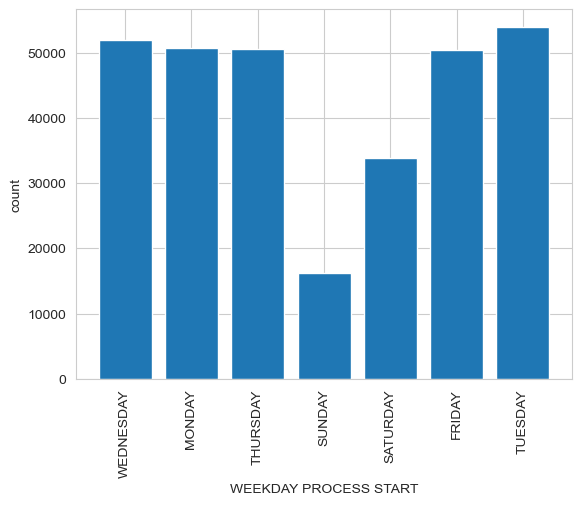

In [41]:
x = df1['WEEKDAY_APPR_PROCESS_START'].value_counts(sort=False).index
y = df1['WEEKDAY_APPR_PROCESS_START'].value_counts(sort=False)

plt.bar(x, y)

plt.xlabel('WEEKDAY PROCESS START')
plt.ylabel('count')

plt.xticks(rotation=90)
plt.show()

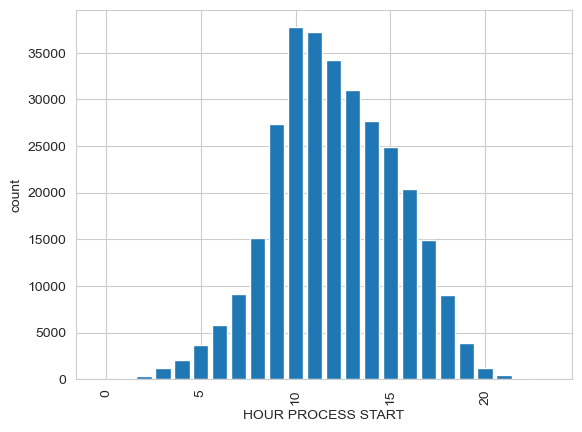

In [84]:
x = df1['HOUR_APPR_PROCESS_START'].value_counts(sort=False).index
y = df1['HOUR_APPR_PROCESS_START'].value_counts(sort=False)

plt.bar(x, y)

plt.xlabel('HOUR PROCESS START')
plt.ylabel('count')

plt.xticks(rotation=90)

plt.show()

# NAME_INCOME_TYPE

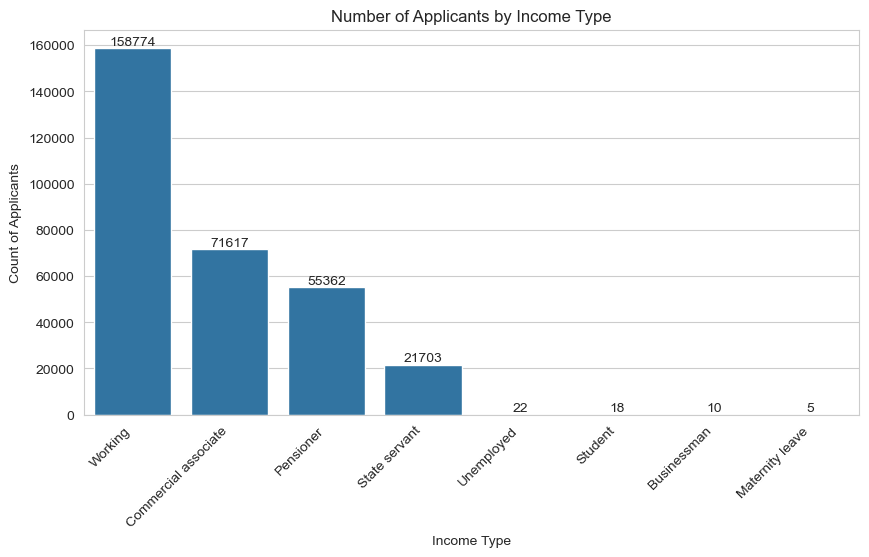

In [82]:
plt.figure(figsize=(10, 5))  

ax = sns.countplot(
    x='NAME_INCOME_TYPE',
    data=df1,
    order=df1['NAME_INCOME_TYPE'].value_counts().index
)

plt.title("Number of Applicants by Income Type")
plt.xlabel("Income Type")
plt.ylabel("Count of Applicants")
plt.xticks(rotation=45, ha='right')

for container in ax.containers:
    ax.bar_label(container)

plt.show()


C:\Users\foxhu\AppData\Local\Temp\ipykernel_3108\2253184955.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='NAME_INCOME_TYPE', y='Default_Rate', data=income_default, ci=None)


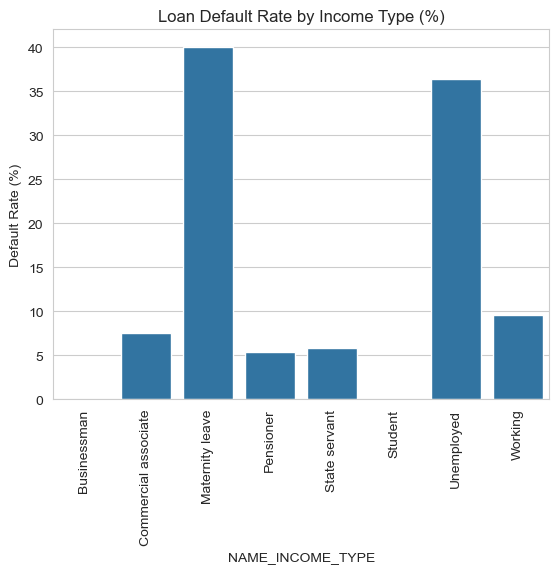

In [92]:
income_default = (
    df1.groupby('NAME_INCOME_TYPE')['TARGET']
       .mean()
       .reset_index()
       .rename(columns={'TARGET': 'Default_Rate'})
)
income_default['Default_Rate'] *= 100

sns.barplot(x='NAME_INCOME_TYPE', y='Default_Rate', data=income_default, ci=None)
plt.xticks(rotation=90)
plt.title("Loan Default Rate by Income Type (%)")
plt.ylabel("Default Rate (%)")
plt.show()


# FLAG_OWN_CAR

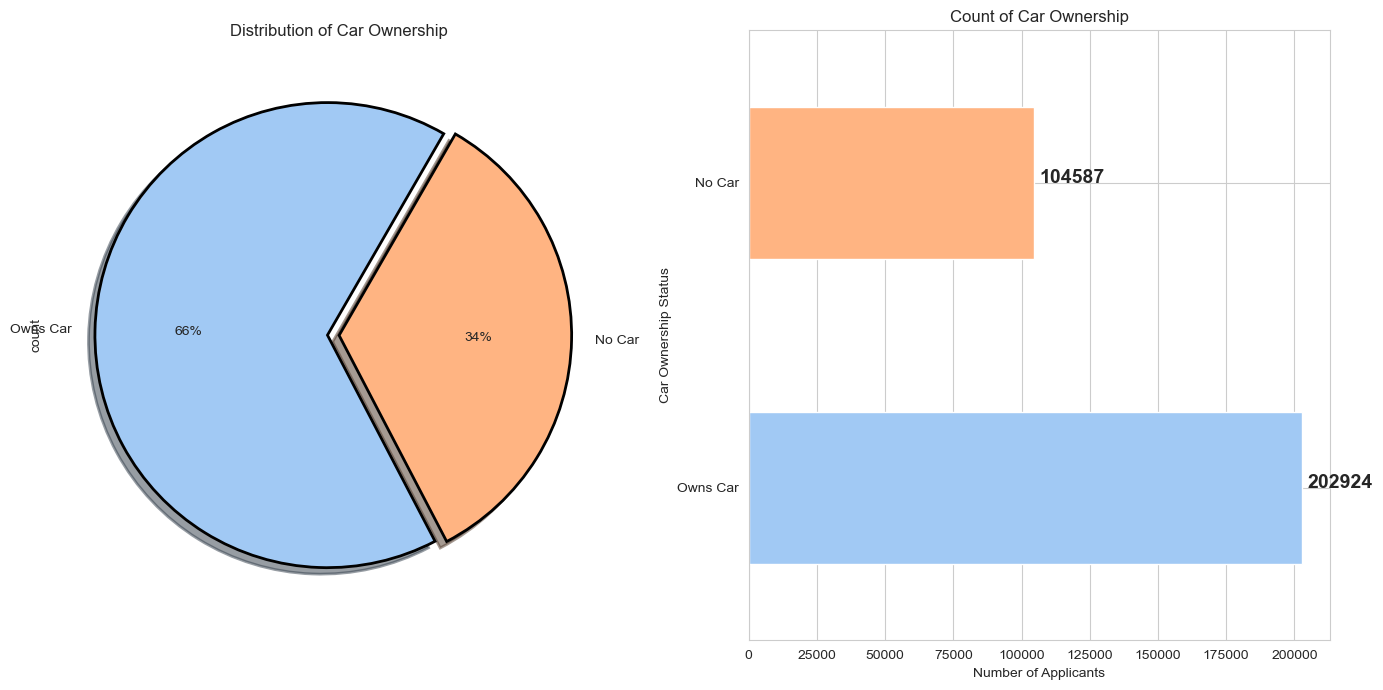

In [ ]:
plt.figure(figsize=(14,7))

plt.subplot(121)
df1["FLAG_OWN_CAR"].value_counts().plot.pie(
    autopct="%1.0f%%",
    colors=sns.color_palette("pastel"),
    startangle=60,
    labels=["Owns Car", "No Car"],
    wedgeprops={"linewidth": 2, "edgecolor": "k"},
    explode=[0.05, 0],
    shadow=True
)
plt.title("Distribution of Car Ownership")

plt.subplot(122)
ax = df1["FLAG_OWN_CAR"].value_counts().plot(kind="barh", color=sns.color_palette("pastel"))

for i, j in enumerate(df1["FLAG_OWN_CAR"].value_counts().values):
    ax.text(j + (max(df1["FLAG_OWN_CAR"].value_counts().values) * 0.01), i, j, weight="bold", fontsize=14)

plt.title("Count of Car Ownership")
plt.xlabel("Number of Applicants")
plt.ylabel("Car Ownership Status")
plt.yticks(ticks=[0, 1], labels=["Owns Car", "No Car"])

plt.tight_layout()
plt.show()


C:\Users\foxhu\AppData\Local\Temp\ipykernel_3108\1912173283.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Default_Rate', y='FLAG_OWN_CAR', data=car_default, ci=None, palette="pastel")
C:\Users\foxhu\AppData\Local\Temp\ipykernel_3108\1912173283.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Default_Rate', y='FLAG_OWN_CAR', data=car_default, ci=None, palette="pastel")


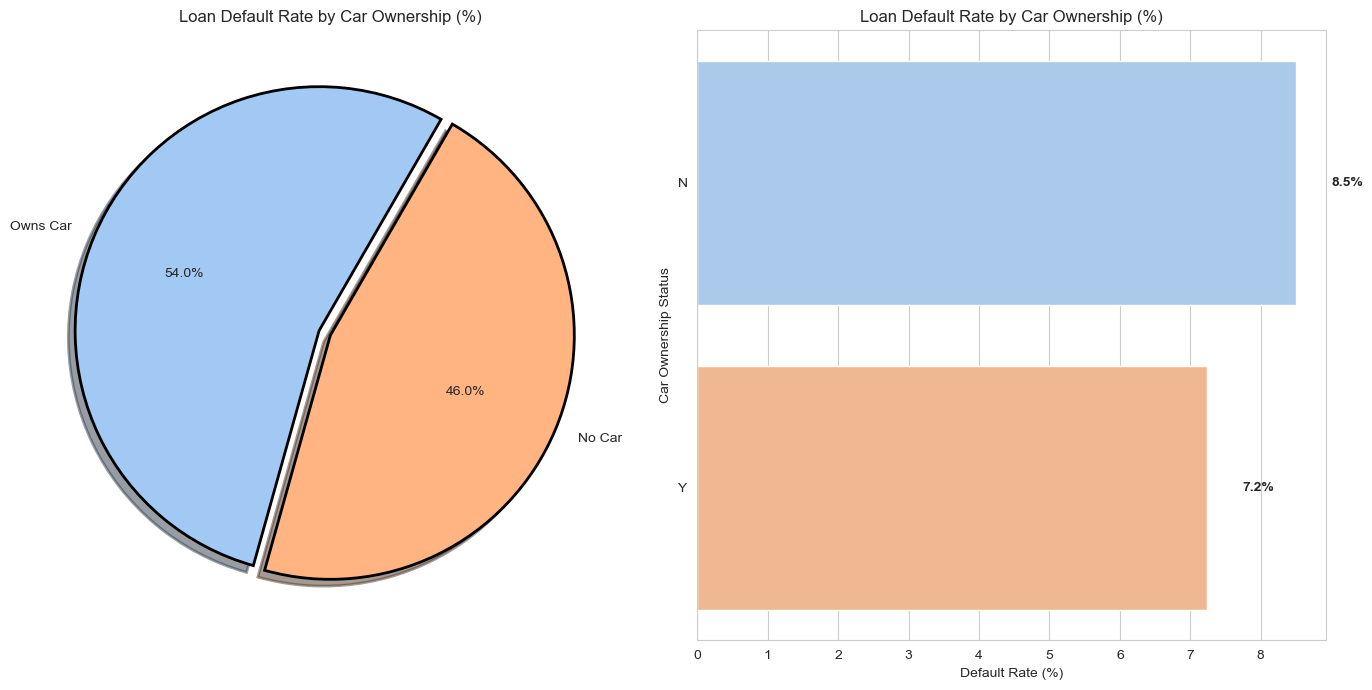

In [116]:
car_default = (
    df1.groupby('FLAG_OWN_CAR')['TARGET']
       .mean()
       .reset_index()
       .rename(columns={'TARGET': 'Default_Rate'})
)
car_default['Default_Rate'] *= 100

plt.figure(figsize=(14,7))

plt.subplot(121)
plt.pie(
    car_default['Default_Rate'],
    labels=['Owns Car', 'No Car'],
    autopct="%1.1f%%",
    colors=sns.color_palette("pastel"),
    startangle=60,
    wedgeprops={"linewidth": 2, "edgecolor": "k"},
    explode=[0.05, 0],
    shadow=True
)
plt.title("Loan Default Rate by Car Ownership (%)")

plt.subplot(122)
ax = sns.barplot(x='Default_Rate', y='FLAG_OWN_CAR', data=car_default, ci=None, palette="pastel")

for i, rate in enumerate(car_default['Default_Rate']):
    ax.text(rate + 0.5, i, f"{rate:.1f}%", va='center', weight='bold')

plt.title("Loan Default Rate by Car Ownership (%)")
plt.xlabel("Default Rate (%)")
plt.ylabel("Car Ownership Status")

plt.tight_layout()
plt.show()


# FLAG_OWN_REALTY

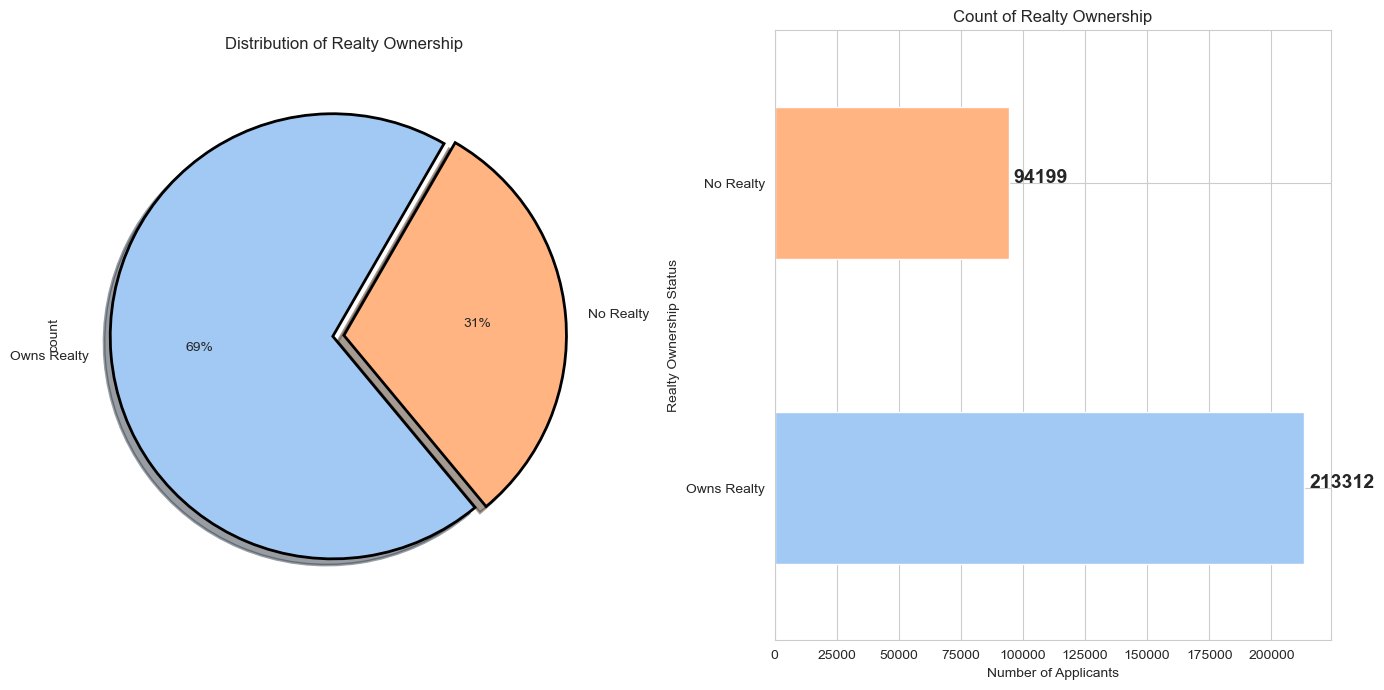

In [117]:
plt.figure(figsize=(14,7))

plt.subplot(121)
df1["FLAG_OWN_REALTY"].value_counts().plot.pie(
    autopct="%1.0f%%",
    colors=sns.color_palette("pastel"),
    startangle=60,
    labels=["Owns Realty", "No Realty"],
    wedgeprops={"linewidth": 2, "edgecolor": "k"},
    explode=[0.05, 0],
    shadow=True
)
plt.title("Distribution of Realty Ownership")

plt.subplot(122)
ax = df1["FLAG_OWN_REALTY"].value_counts().plot(kind="barh", color=sns.color_palette("pastel"))
for i, j in enumerate(df1["FLAG_OWN_REALTY"].value_counts().values):
    ax.text(j + (max(df1["FLAG_OWN_REALTY"].value_counts().values) * 0.01), i, j, weight="bold", fontsize=14)

plt.title("Count of Realty Ownership")
plt.xlabel("Number of Applicants")
plt.ylabel("Realty Ownership Status")
plt.yticks(ticks=[0, 1], labels=["Owns Realty", "No Realty"])

plt.tight_layout()
plt.show()


C:\Users\foxhu\AppData\Local\Temp\ipykernel_3108\2789925196.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Default_Rate', y='FLAG_OWN_REALTY', data=realty_default, ci=None, palette="pastel")
C:\Users\foxhu\AppData\Local\Temp\ipykernel_3108\2789925196.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Default_Rate', y='FLAG_OWN_REALTY', data=realty_default, ci=None, palette="pastel")


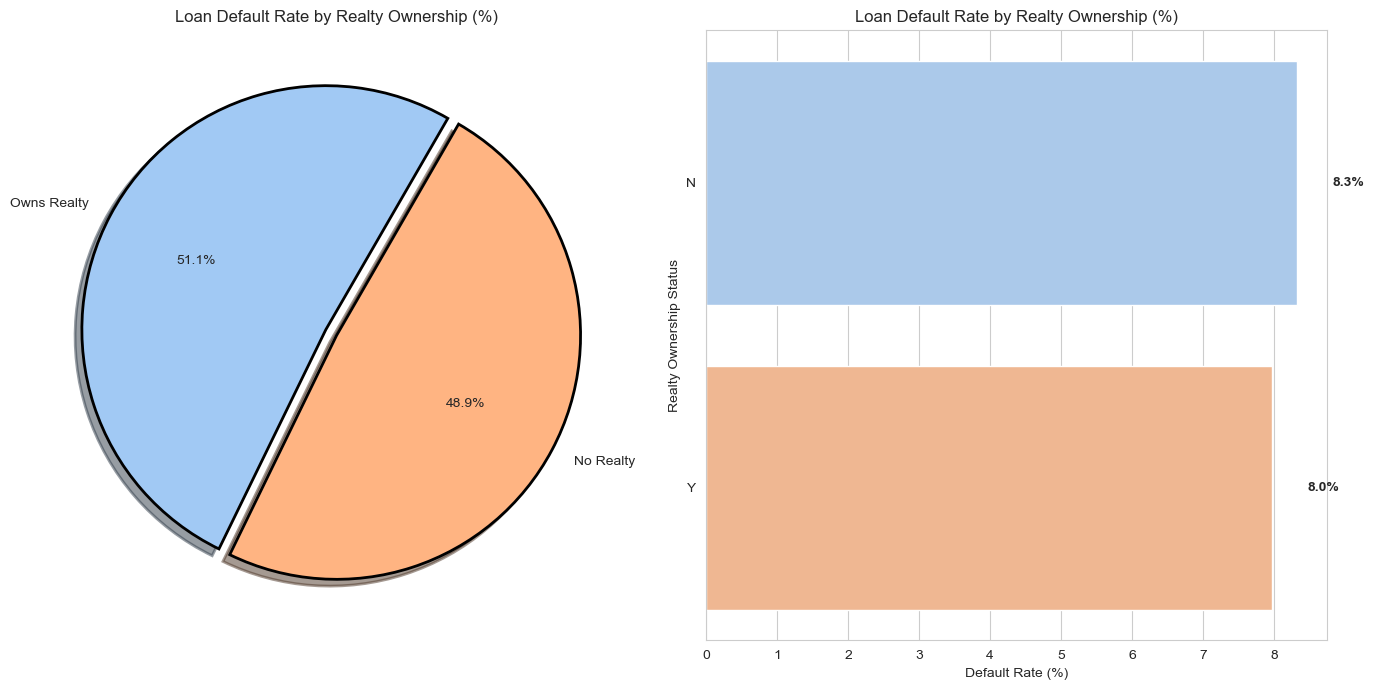

In [118]:
realty_default = (
    df1.groupby('FLAG_OWN_REALTY')['TARGET']
       .mean()
       .reset_index()
       .rename(columns={'TARGET': 'Default_Rate'})
)
realty_default['Default_Rate'] *= 100

plt.figure(figsize=(14,7))

plt.subplot(121)
plt.pie(
    realty_default['Default_Rate'],
    labels=['Owns Realty', 'No Realty'],
    autopct="%1.1f%%",
    colors=sns.color_palette("pastel"),
    startangle=60,
    wedgeprops={"linewidth": 2, "edgecolor": "k"},
    explode=[0.05, 0],
    shadow=True
)
plt.title("Loan Default Rate by Realty Ownership (%)")

plt.subplot(122)
ax = sns.barplot(x='Default_Rate', y='FLAG_OWN_REALTY', data=realty_default, ci=None, palette="pastel")
for i, rate in enumerate(realty_default['Default_Rate']):
    ax.text(rate + 0.5, i, f"{rate:.1f}%", va='center', weight='bold')

plt.title("Loan Default Rate by Realty Ownership (%)")
plt.xlabel("Default Rate (%)")
plt.ylabel("Realty Ownership Status")
plt.tight_layout()
plt.show()

# HOUSE TYPE

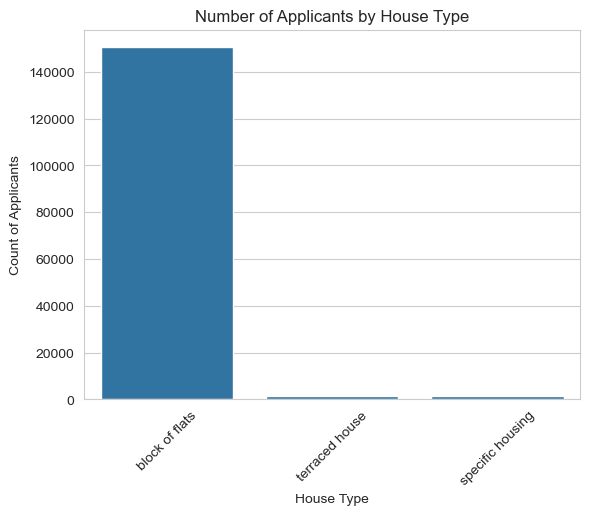

In [96]:
sns.countplot(x='HOUSETYPE_MODE', data=df1)
plt.title("Number of Applicants by House Type")
plt.xlabel("House Type")
plt.ylabel("Count of Applicants")
plt.xticks(rotation=45)
plt.show()


C:\Users\foxhu\AppData\Local\Temp\ipykernel_3108\1443189621.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='HOUSETYPE_MODE', y='Default_Rate', data=housetype_default, ci=None)


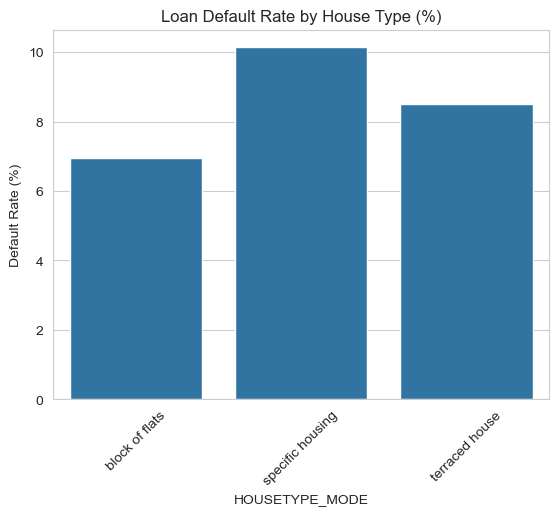

In [72]:
housetype_default = (
    df1.groupby('HOUSETYPE_MODE')['TARGET']
       .mean()
       .reset_index()
       .rename(columns={'TARGET': 'Default_Rate'})
)
housetype_default['Default_Rate'] *= 100

sns.barplot(x='HOUSETYPE_MODE', y='Default_Rate', data=housetype_default, ci=None)
plt.xticks(rotation=45)
plt.title("Loan Default Rate by House Type (%)")
plt.ylabel("Default Rate (%)")
plt.show()


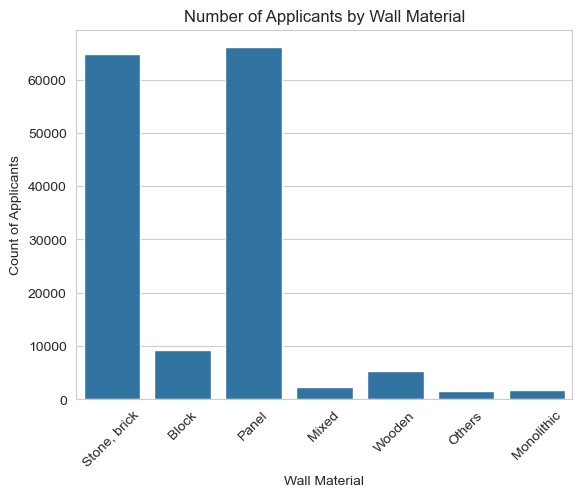

In [97]:
sns.countplot(x='WALLSMATERIAL_MODE', data=df1)
plt.title("Number of Applicants by Wall Material")
plt.xlabel("Wall Material")
plt.ylabel("Count of Applicants")
plt.xticks(rotation=45)
plt.show()


C:\Users\foxhu\AppData\Local\Temp\ipykernel_3108\2257770386.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='WALLSMATERIAL_MODE', y='Default_Rate', data=wall_default, ci=None)


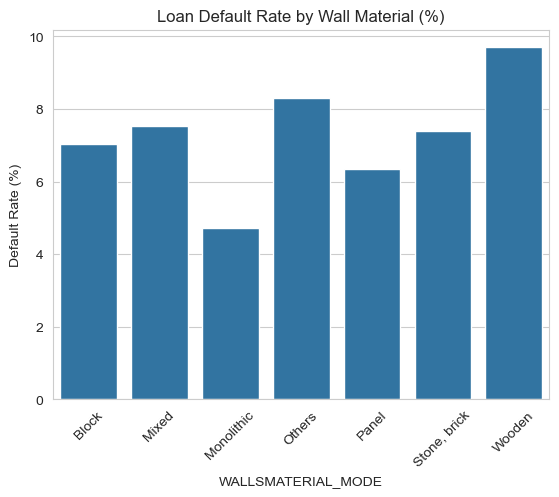

In [73]:
wall_default = (
    df1.groupby('WALLSMATERIAL_MODE')['TARGET']
       .mean()
       .reset_index()
       .rename(columns={'TARGET': 'Default_Rate'})
)
wall_default['Default_Rate'] *= 100

sns.barplot(x='WALLSMATERIAL_MODE', y='Default_Rate', data=wall_default, ci=None)
plt.xticks(rotation=45)
plt.title("Loan Default Rate by Wall Material (%)")
plt.ylabel("Default Rate (%)")
plt.show()


# FONDKAPREMONT

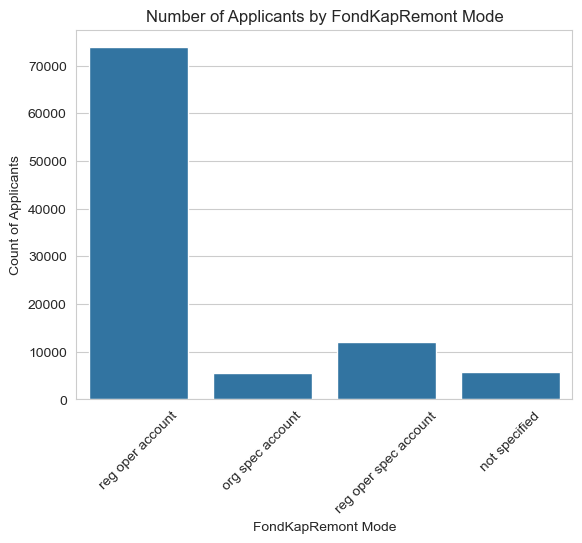

In [98]:
sns.countplot(x='FONDKAPREMONT_MODE', data=df1)
plt.title("Number of Applicants by FondKapRemont Mode")
plt.xlabel("FondKapRemont Mode")
plt.ylabel("Count of Applicants")
plt.xticks(rotation=45)
plt.show()

C:\Users\foxhu\AppData\Local\Temp\ipykernel_3108\505126129.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='FONDKAPREMONT_MODE', y='Default_Rate', data=fond_default, ci=None)


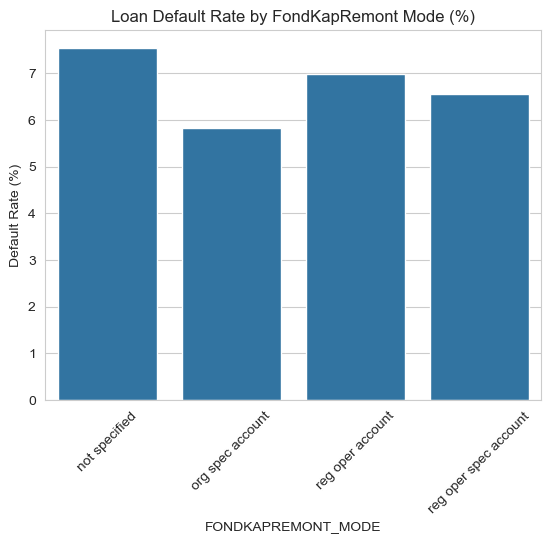

In [74]:
fond_default = (
    df1.groupby('FONDKAPREMONT_MODE')['TARGET']
       .mean()
       .reset_index()
       .rename(columns={'TARGET': 'Default_Rate'})
)
fond_default['Default_Rate'] *= 100

sns.barplot(x='FONDKAPREMONT_MODE', y='Default_Rate', data=fond_default, ci=None)
plt.xticks(rotation=45)
plt.title("Loan Default Rate by FondKapRemont Mode (%)")
plt.ylabel("Default Rate (%)")
plt.show()


# EMERGENCY STATE

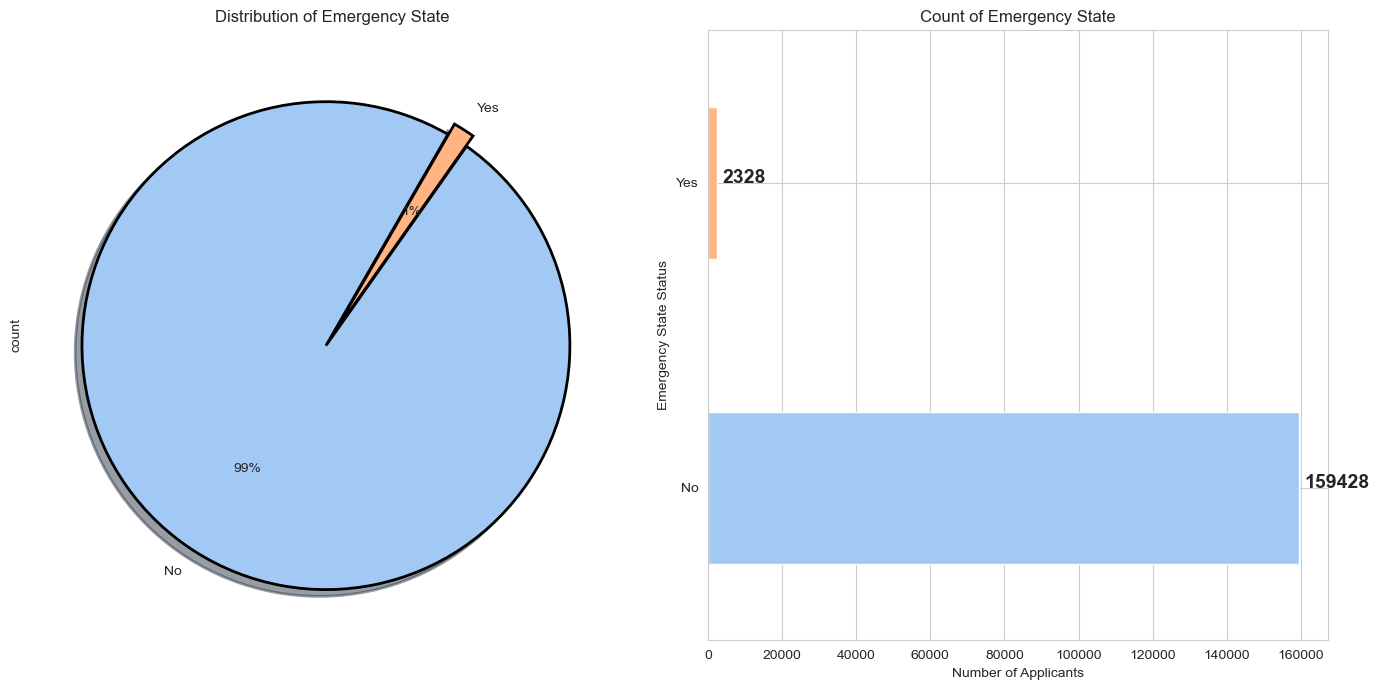

In [119]:
plt.figure(figsize=(14,7))

plt.subplot(121)
df1["EMERGENCYSTATE_MODE"].value_counts().plot.pie(
    autopct="%1.0f%%",
    colors=sns.color_palette("pastel"),
    startangle=60,
    labels=df1["EMERGENCYSTATE_MODE"].value_counts().index,
    wedgeprops={"linewidth": 2, "edgecolor": "k"},
    explode=[0.05 if i==0 else 0 for i in range(len(df1["EMERGENCYSTATE_MODE"].value_counts()))],
    shadow=True
)
plt.title("Distribution of Emergency State")

plt.subplot(122)
ax = df1["EMERGENCYSTATE_MODE"].value_counts().plot(kind="barh", color=sns.color_palette("pastel"))
for i, j in enumerate(df1["EMERGENCYSTATE_MODE"].value_counts().values):
    ax.text(j + (max(df1["EMERGENCYSTATE_MODE"].value_counts().values) * 0.01), i, j, weight="bold", fontsize=14)

plt.title("Count of Emergency State")
plt.xlabel("Number of Applicants")
plt.ylabel("Emergency State Status")
plt.yticks(ticks=range(len(df1["EMERGENCYSTATE_MODE"].value_counts())),
           labels=df1["EMERGENCYSTATE_MODE"].value_counts().index)

plt.tight_layout()
plt.show()


C:\Users\foxhu\AppData\Local\Temp\ipykernel_3108\2542706654.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Default_Rate', y='EMERGENCYSTATE_MODE', data=emergency_default, ci=None, palette="pastel")
C:\Users\foxhu\AppData\Local\Temp\ipykernel_3108\2542706654.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Default_Rate', y='EMERGENCYSTATE_MODE', data=emergency_default, ci=None, palette="pastel")


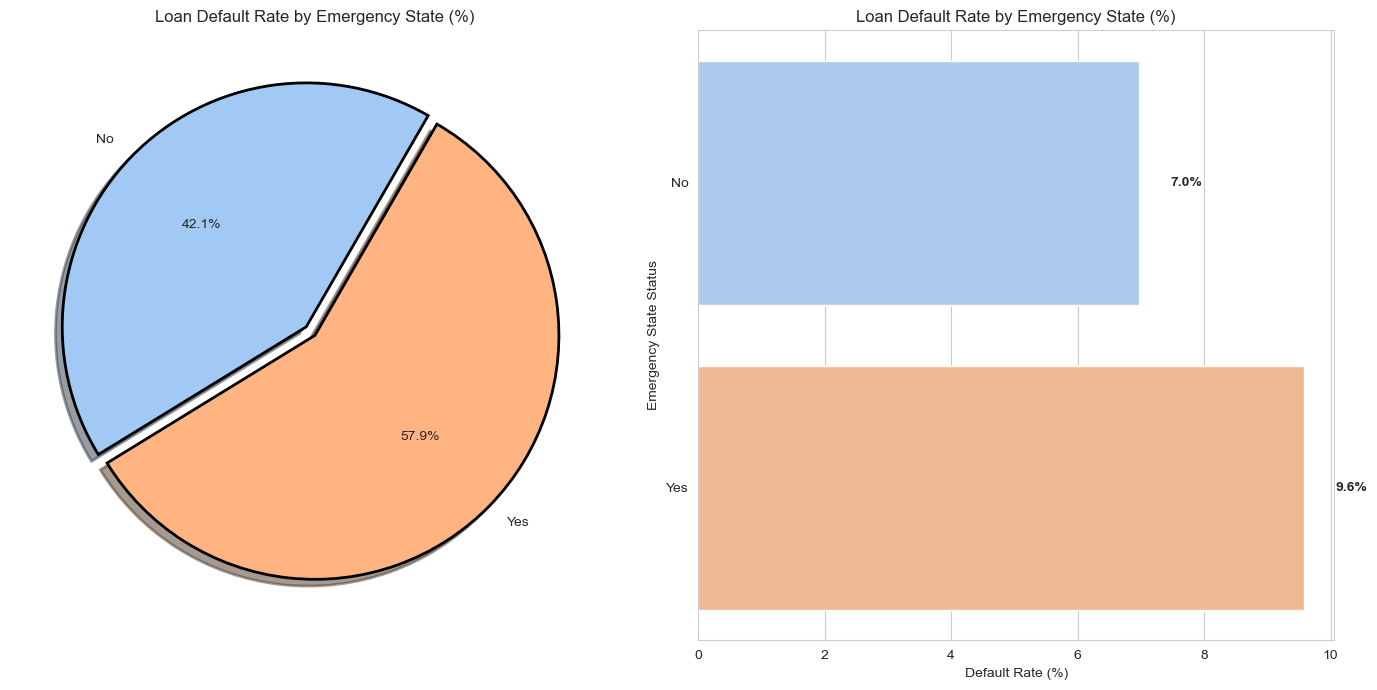

In [120]:
emergency_default = (
    df1.groupby('EMERGENCYSTATE_MODE')['TARGET']
       .mean()
       .reset_index()
       .rename(columns={'TARGET': 'Default_Rate'})
)
emergency_default['Default_Rate'] *= 100

plt.figure(figsize=(14,7))

plt.subplot(121)
plt.pie(
    emergency_default['Default_Rate'],
    labels=emergency_default['EMERGENCYSTATE_MODE'],
    autopct="%1.1f%%",
    colors=sns.color_palette("pastel"),
    startangle=60,
    wedgeprops={"linewidth": 2, "edgecolor": "k"},
    explode=[0.05 if i==0 else 0 for i in range(len(emergency_default))],
    shadow=True
)
plt.title("Loan Default Rate by Emergency State (%)")

plt.subplot(122)
ax = sns.barplot(x='Default_Rate', y='EMERGENCYSTATE_MODE', data=emergency_default, ci=None, palette="pastel")
for i, rate in enumerate(emergency_default['Default_Rate']):
    ax.text(rate + 0.5, i, f"{rate:.1f}%", va='center', weight='bold')

plt.title("Loan Default Rate by Emergency State (%)")
plt.xlabel("Default Rate (%)")
plt.ylabel("Emergency State Status")
plt.tight_layout()
plt.show()


# OCCUPATION

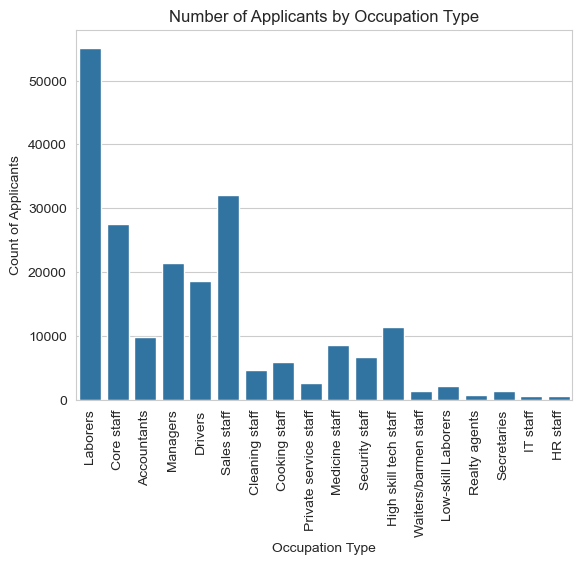

In [105]:
sns.countplot(x='OCCUPATION_TYPE', data=df1)
plt.title("Number of Applicants by Occupation Type")
plt.xlabel("Occupation Type")
plt.ylabel("Count of Applicants")
plt.xticks(rotation=90)
plt.show()


C:\Users\foxhu\AppData\Local\Temp\ipykernel_3108\1947125480.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='OCCUPATION_TYPE', y='Default_Rate', data=occupation_default, ci=None)


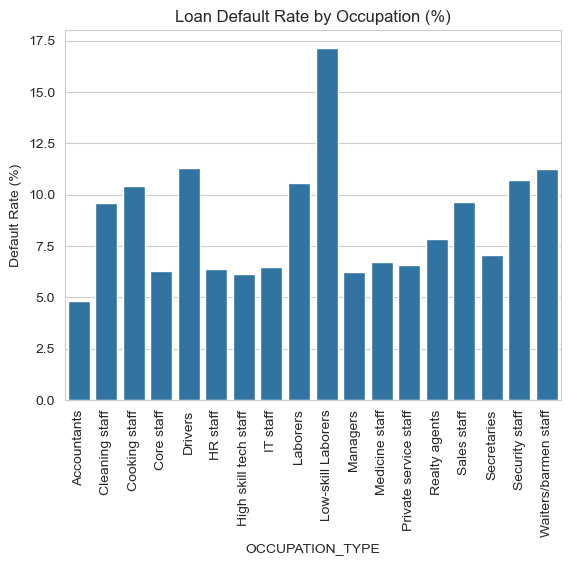

In [63]:
occupation_default = (
    df1.groupby('OCCUPATION_TYPE')['TARGET']
       .mean()
       .reset_index()
       .rename(columns={'TARGET': 'Default_Rate'})
)
occupation_default['Default_Rate'] *= 100

sns.barplot(x='OCCUPATION_TYPE', y='Default_Rate', data=occupation_default, ci=None)
plt.xticks(rotation=90)
plt.title("Loan Default Rate by Occupation (%)")
plt.ylabel("Default Rate (%)")
plt.show()


# ORGANIZATION

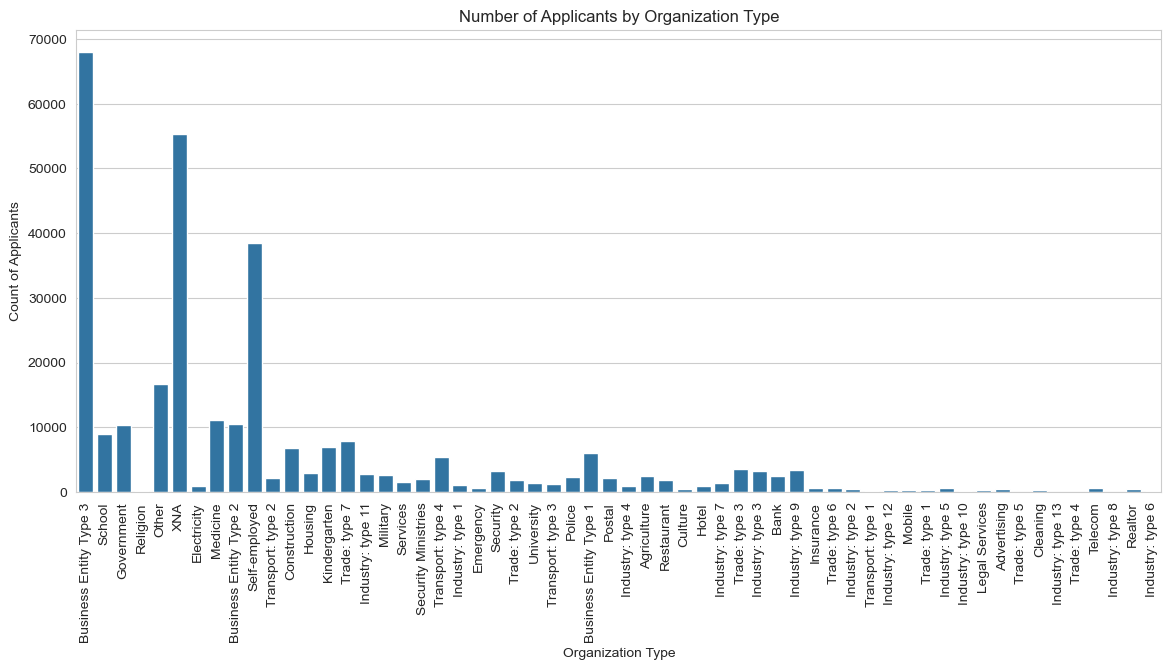

In [107]:
plt.figure(figsize=(14, 6))
sns.countplot(x='ORGANIZATION_TYPE', data=df1)
plt.title("Number of Applicants by Organization Type")
plt.xlabel("Organization Type")
plt.ylabel("Count of Applicants")
plt.xticks(rotation=90)
plt.show()


C:\Users\foxhu\AppData\Local\Temp\ipykernel_3108\3602476246.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ORGANIZATION_TYPE', y='Default_Rate', data=organization_default, ci=None)


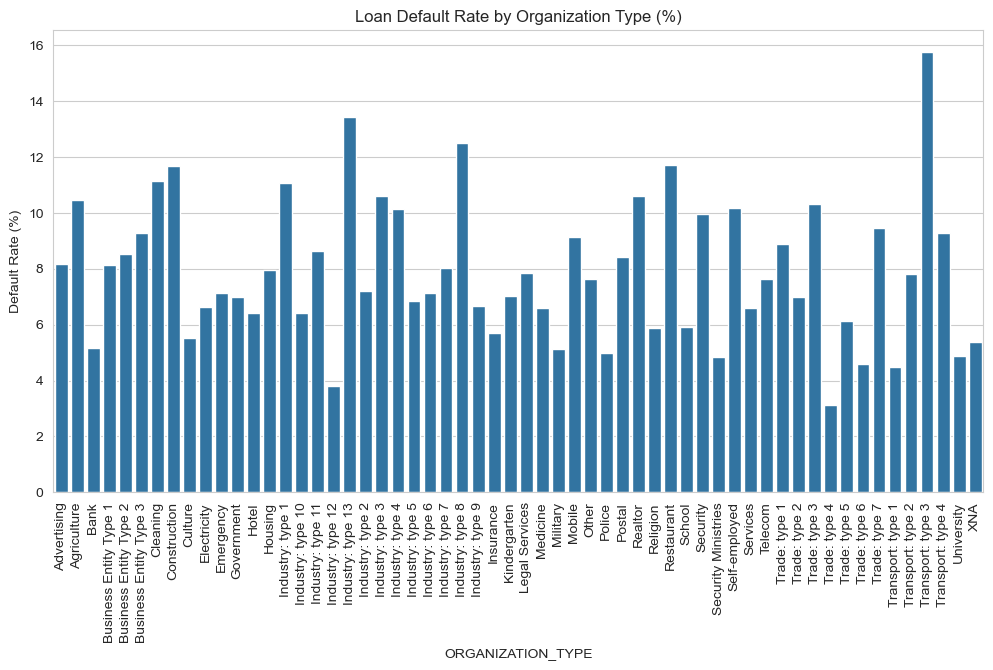

In [106]:
organization_default = (
    df1.groupby('ORGANIZATION_TYPE')['TARGET']
       .mean()
       .reset_index()
       .rename(columns={'TARGET': 'Default_Rate'})
)
plt.figure(figsize=(12, 6))
organization_default['Default_Rate'] *= 100

sns.barplot(x='ORGANIZATION_TYPE', y='Default_Rate', data=organization_default, ci=None)
plt.xticks(rotation=90)
plt.title("Loan Default Rate by Organization Type (%)")
plt.ylabel("Default Rate (%)")
plt.show()


# REGION

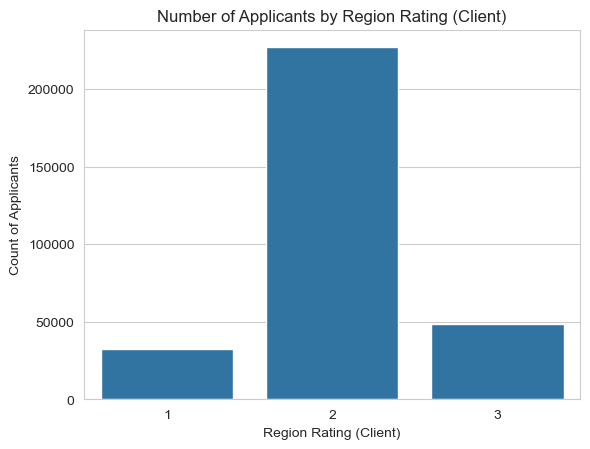

In [108]:
sns.countplot(x='REGION_RATING_CLIENT', data=df1)
plt.title("Number of Applicants by Region Rating (Client)")
plt.xlabel("Region Rating (Client)")
plt.ylabel("Count of Applicants")
plt.show()

C:\Users\foxhu\AppData\Local\Temp\ipykernel_3108\459406913.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='REGION_RATING_CLIENT', y='Default_Rate', data=region_rating_default, ci=None)


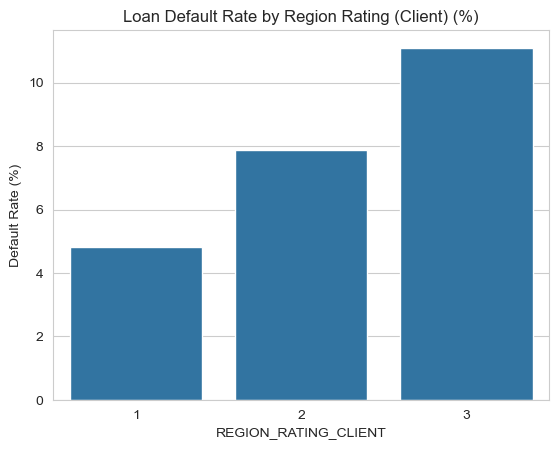

In [69]:
region_rating_default = (
    df1.groupby('REGION_RATING_CLIENT')['TARGET']
       .mean()
       .reset_index()
       .rename(columns={'TARGET': 'Default_Rate'})
)
region_rating_default['Default_Rate'] *= 100

sns.barplot(x='REGION_RATING_CLIENT', y='Default_Rate', data=region_rating_default, ci=None)
plt.title("Loan Default Rate by Region Rating (Client) (%)")
plt.ylabel("Default Rate (%)")
plt.show()


C:\Users\foxhu\AppData\Local\Temp\ipykernel_3108\383068904.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby('REGION_POP_BIN')['TARGET']
C:\Users\foxhu\AppData\Local\Temp\ipykernel_3108\383068904.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='REGION_POP_BIN', y='Default_Rate', data=region_pop_default, ci=None,


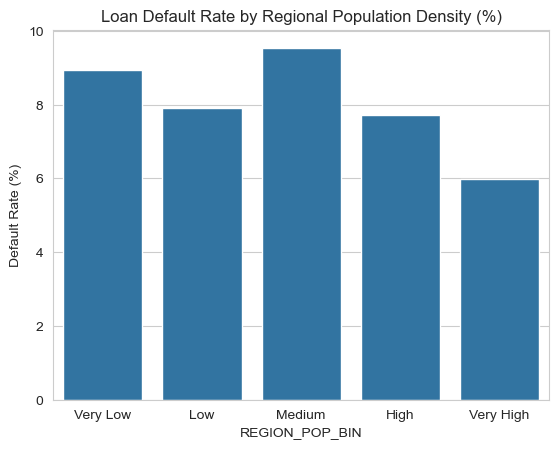

In [71]:
df1['REGION_POP_BIN'] = pd.qcut(df1['REGION_POPULATION_RELATIVE'], 5, labels=['Very Low','Low','Medium','High','Very High'])

region_pop_default = (
    df1.groupby('REGION_POP_BIN')['TARGET']
       .mean()
       .reset_index()
       .rename(columns={'TARGET': 'Default_Rate'})
)
region_pop_default['Default_Rate'] *= 100

sns.barplot(x='REGION_POP_BIN', y='Default_Rate', data=region_pop_default, ci=None,
            order=['Very Low','Low','Medium','High','Very High'])
plt.title("Loan Default Rate by Regional Population Density (%)")
plt.ylabel("Default Rate (%)")
plt.show()


# NAME_CONTRACT_TYPE

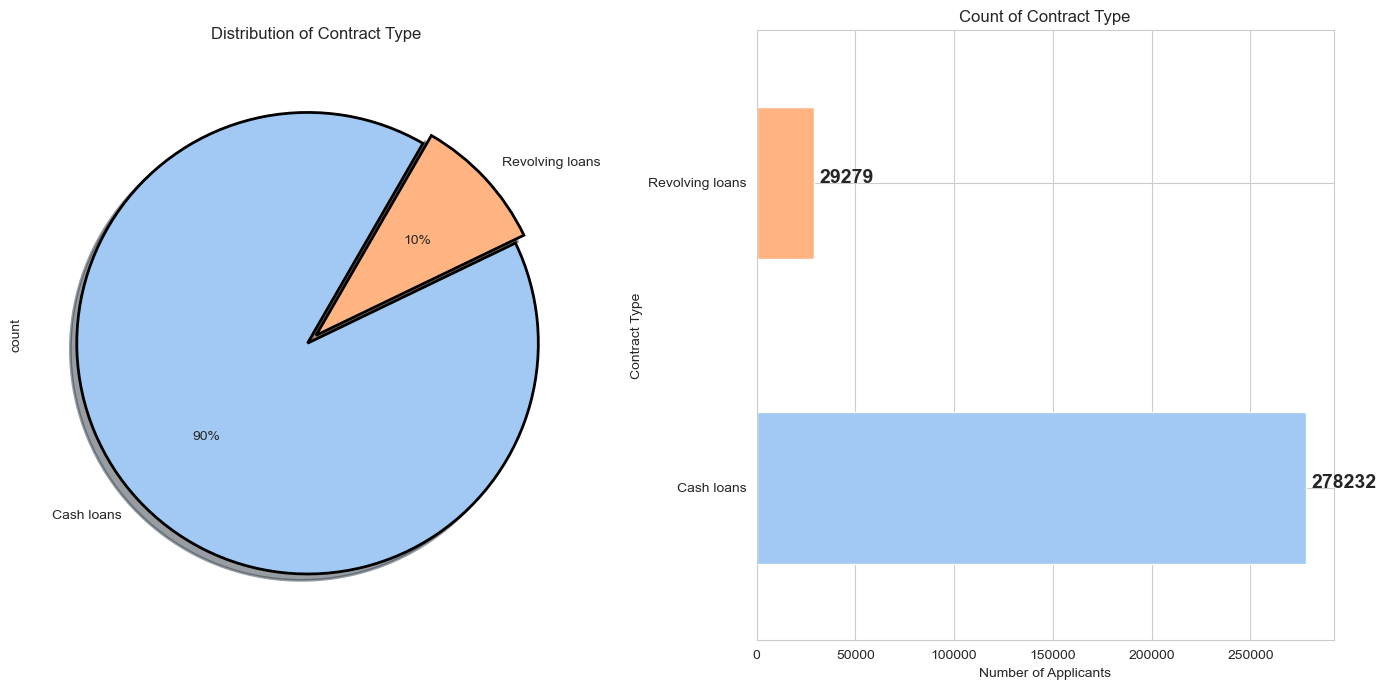

In [122]:
plt.figure(figsize=(14,7))

plt.subplot(121)
df1["NAME_CONTRACT_TYPE"].value_counts(sort=False).plot.pie(
    autopct="%1.0f%%",
    colors=sns.color_palette("pastel"),
    startangle=60,
    labels=df1["NAME_CONTRACT_TYPE"].value_counts(sort=False).index,
    wedgeprops={"linewidth": 2, "edgecolor": "k"},
    explode=[0.05 if i==0 else 0 for i in range(len(df1["NAME_CONTRACT_TYPE"].value_counts(sort=False)))],
    shadow=True
)
plt.title("Distribution of Contract Type")

plt.subplot(122)
ax = df1["NAME_CONTRACT_TYPE"].value_counts(sort=False).plot(kind="barh", color=sns.color_palette("pastel"))
for i, j in enumerate(df1["NAME_CONTRACT_TYPE"].value_counts(sort=False).values):
    ax.text(j + (max(df1["NAME_CONTRACT_TYPE"].value_counts(sort=False).values) * 0.01), i, j, weight="bold", fontsize=14)

plt.title("Count of Contract Type")
plt.xlabel("Number of Applicants")
plt.ylabel("Contract Type")
plt.yticks(ticks=range(len(df1["NAME_CONTRACT_TYPE"].value_counts(sort=False))),
           labels=df1["NAME_CONTRACT_TYPE"].value_counts(sort=False).index)

plt.tight_layout()
plt.show()


C:\Users\foxhu\AppData\Local\Temp\ipykernel_3108\1491536913.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Default_Rate', y='NAME_CONTRACT_TYPE', data=contract_default, ci=None, palette="pastel")
C:\Users\foxhu\AppData\Local\Temp\ipykernel_3108\1491536913.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Default_Rate', y='NAME_CONTRACT_TYPE', data=contract_default, ci=None, palette="pastel")


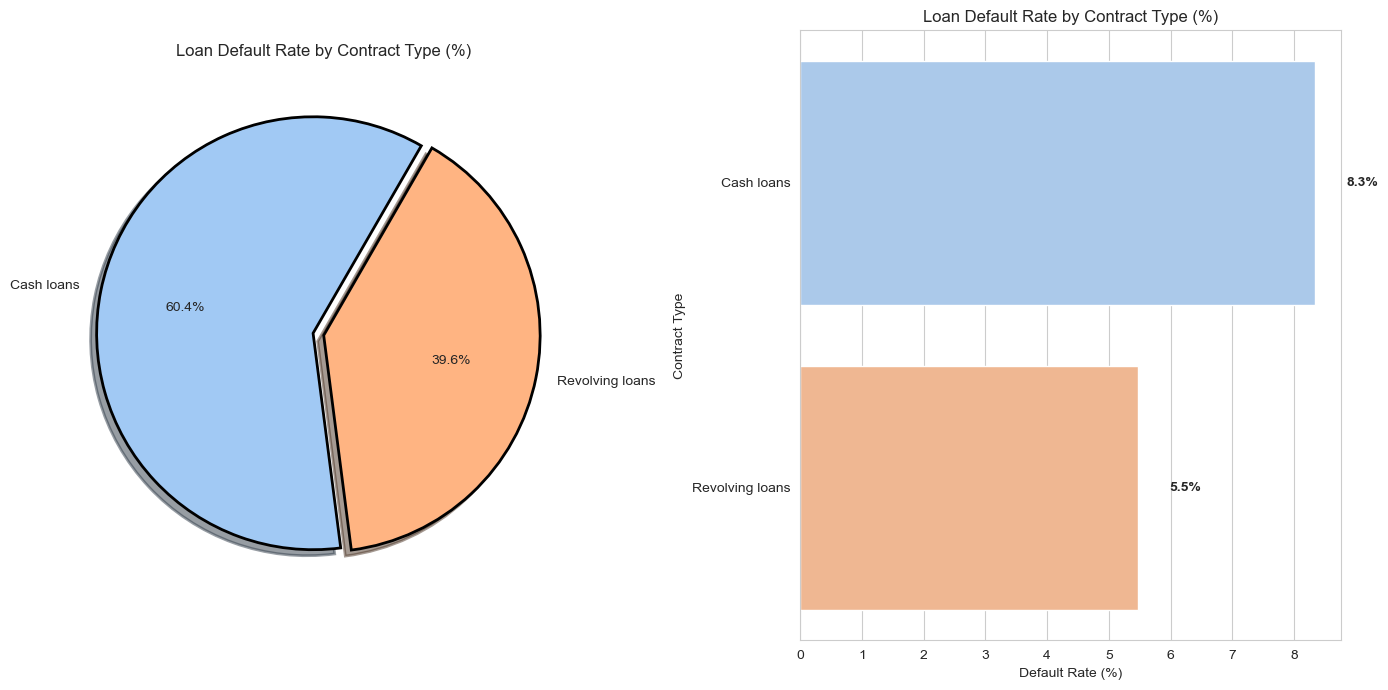

In [121]:
contract_default = (
    df1.groupby('NAME_CONTRACT_TYPE')['TARGET']
       .mean()
       .reset_index()
       .rename(columns={'TARGET': 'Default_Rate'})
)
contract_default['Default_Rate'] *= 100

plt.figure(figsize=(14,7))

plt.subplot(121)
plt.pie(
    contract_default['Default_Rate'],
    labels=contract_default['NAME_CONTRACT_TYPE'],
    autopct="%1.1f%%",
    colors=sns.color_palette("pastel"),
    startangle=60,
    wedgeprops={"linewidth": 2, "edgecolor": "k"},
    explode=[0.05 if i==0 else 0 for i in range(len(contract_default))],
    shadow=True
)
plt.title("Loan Default Rate by Contract Type (%)")

plt.subplot(122)
ax = sns.barplot(x='Default_Rate', y='NAME_CONTRACT_TYPE', data=contract_default, ci=None, palette="pastel")
for i, rate in enumerate(contract_default['Default_Rate']):
    ax.text(rate + 0.5, i, f"{rate:.1f}%", va='center', weight='bold')

plt.title("Loan Default Rate by Contract Type (%)")
plt.xlabel("Default Rate (%)")
plt.ylabel("Contract Type")
plt.tight_layout()
plt.show()


# GENDER

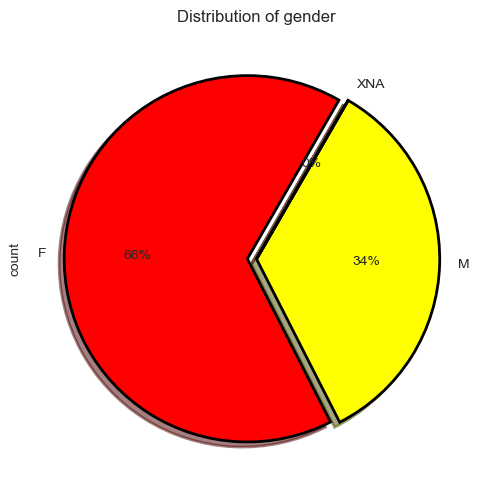

In [46]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
df1["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["red","yellow"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of gender")
plt.show()


# AMT_CREDIT distribution

Text(0.5, 1.0, 'AMT_CREDIT distribution')

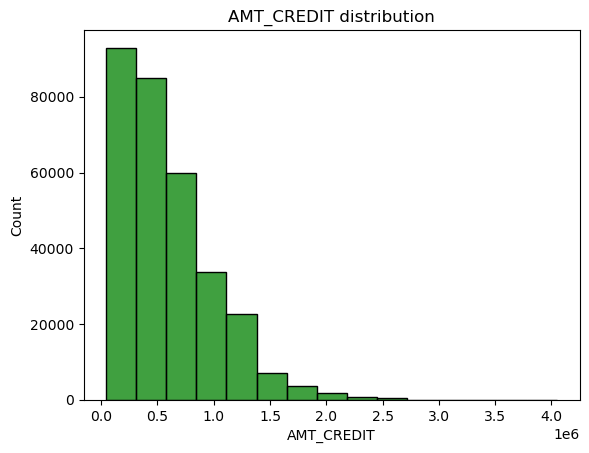

In [13]:
sns.histplot(df1['AMT_CREDIT'], kde = False, bins = 15, color = 'green')
plt.title('AMT_CREDIT distribution')


<Axes: ylabel='AMT_CREDIT'>

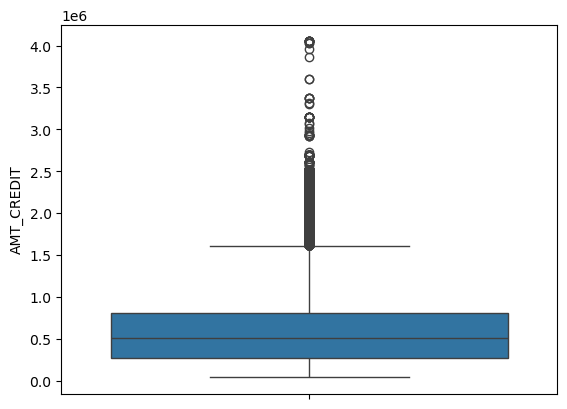

In [14]:
sns.boxplot(df1['AMT_CREDIT'])


# AMT_ANNUITY

C:\Users\foxhu\AppData\Local\Temp\ipykernel_3108\2066000548.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['AMT_ANNUITY'])


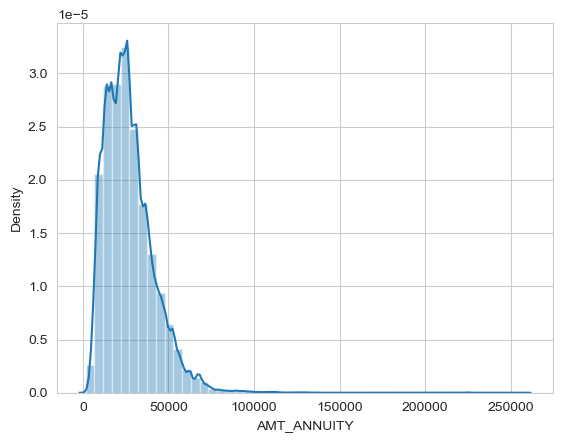

In [16]:
sns.set_style('whitegrid') 
sns.distplot(df1['AMT_ANNUITY']) 
plt.show()


# AMT_GOODS_PRICE

C:\Users\foxhu\AppData\Local\Temp\ipykernel_3108\2661931212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['AMT_GOODS_PRICE'])


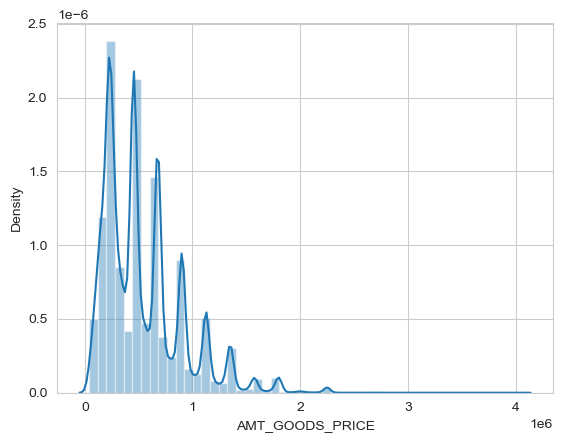

In [17]:
sns.set_style('whitegrid') 
sns.distplot(df1['AMT_GOODS_PRICE']) 
plt.show()
